<a href="https://colab.research.google.com/github/ameyer12/CSCE5210-Project1/blob/main/CSCE_5210_Project_1_R2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
from random import choice
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
seed=1000           # seed the graph for reproducibility, you should be doing this
G= nx.gnp_random_graph (10, .3, seed=seed )       # here we create a random binomial graph with 10 nodes and an average (expected) connectivity of 10*.3= 3.
print ( G.nodes() )

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
nx.is_connected(G)      # check whether G which has at least one path between each pair of nodes.

True

In [ ]:
# needed for R2
G.add_edges_from([(0, 3, {'weight': 0.1}), (0, 8,{'weight': 0.8}), (3,8,{'weight': 0.8}), (8,1, {'weight': 1.0}), (8,6, {'weight': 0.7}), (1,6, {'weight': 1.0}),  (1,4, {'weight': 0.6}),  (6,4, {'weight': 0.5}),  (6,7,{'weight': 0.9}), (4,5, {'weight': 0.5}), (4,7, {'weight': 0.4}), (4,9, {'weight': 1.0}),(7,5, {'weight': 0.8}),(7,9, {'weight': 0.4})])

In [ ]:
for u, v in G.edges:      # needed for requirement R3.
  G.add_edge(u, v, weight=round(random.random(),1))

In [ ]:
print(G.edges())

[(0, 3), (0, 8), (1, 4), (1, 6), (1, 8), (2, 8), (3, 8), (4, 5), (4, 6), (4, 7), (4, 9), (5, 7), (6, 7), (6, 8), (7, 9)]


node degree and node clustering
0 2 1.0
1 3 0.6666666666666666
2 1 0
3 2 1.0
4 5 0.4
5 2 1.0
6 4 0.5
7 4 0.5
8 5 0.2
9 2 1.0

the adjacency list
0 3 8
1 4 6 8
2 8
3 8
4 5 6 7 9
5 7
6 7 8
7 9
8
9


<ipython-input-8-c118bbf623e2>:12: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


{(0, 3): 0.7, (0, 8): 0.1, (1, 4): 0.4, (1, 6): 0.4, (1, 8): 0.6, (2, 8): 0.6, (3, 8): 0.1, (4, 5): 0.3, (4, 6): 0.9, (4, 7): 0.4, (4, 9): 0.7, (5, 7): 0.6, (6, 7): 0.2, (6, 8): 0.8, (7, 9): 0.3}


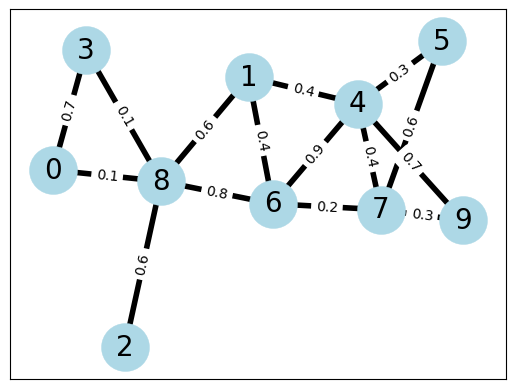

In [ ]:
# some properties
print("node degree and node clustering")
for v in nx.nodes(G):
    print(f"{v} {nx.degree(G, v)} {nx.clustering(G, v)}")

print()
print("the adjacency list")
for line in nx.generate_adjlist(G):
    print(line)

links = [(u, v) for (u, v, d) in G.edges(data=True)]
pos = nx.nx_pydot.graphviz_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1200, node_color='lightblue', linewidths=0.25) # draw nodes
nx.draw_networkx_edges(G, pos, edgelist=links, width=4)                               # draw edges

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels

edge_labels = nx.get_edge_attributes(G, "weight")
print(edge_labels)
#print("%.2f" % edge_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.show()


In [ ]:
# Function to generate requests at each clock tick
def generateRequests():
    requestList = []
    # Likely going to use random.randint(1,10), but for now just create 2 requests per clock tick
    for i in range(0, 2):
      pickUp = random.randint(0, 9)
      dropOff = choice([i for i in range(0,9) if i not in [pickUp]])
      requestList.append([pickUp, dropOff])

    return requestList

In [ ]:
# Function to create routes dictionary
def createRoutesObject(vanNum):
  routes = {}
  for i in range(0, vanNum):
    routes['r' + str(i+1)] = [0]
  return routes

In [ ]:
# Function to create serviceQueues object
def createServiceQueuesObject(vanNum):
  serviceQueues = {}
  for i in range(0, vanNum):
    serviceQueues['s' + str(i+1)] = []
  return serviceQueues

In [ ]:
# Function to create distanceToPickUp object
def createDistanceToPickUpObject(vanNum):
  distanceToPickUp = {}
  for i in range(0, vanNum):
    distanceToPickUp['s' + str(i+1)] = 0
  return distanceToPickUp

In [ ]:
def main():
    # Variable to store number of vans
    numVans = 2

    # Dictionary to hold the route list for each van
    routes = createRoutesObject(numVans)

    # Dictionary to hold the service queue for each van
    serviceQueues = createServiceQueuesObject(numVans)

    # Dictionary to store distance to pickup point
    distanceToPickUp = createDistanceToPickUpObject(numVans)

    # Variable to keep track of the customer ID
    customerId = 1

    # Lists to hold new requests for each van
    sNewRequests = {f's{i}': [] for i in range(1, numVans + 1)}

    # Variable to store clockTick
    clockTick = 1

    totalServiced = {
        's1': [],
        's2': [],
    }

    # In implementation add, logic to keep loop running until queues are empty
    while clockTick < 6 or any(len(serviceQueues[f's{i}']) > 0 for i in range(1, numVans + 1)):
        # Generate a random number of new requests on each clock tick
        newRequests = generateRequests()

        # Variable to store the current node for each van
        rCurrentNodes = {f'r{i}': routes[f'r{i}'][-1] for i in range(1, numVans + 1)}

        # Loop to handle drop offs
        j = 1
        for van in rCurrentNodes:
          k = 0
          currentNode = rCurrentNodes[van]
          # print(van, "current node:", currentNode)

          if len(serviceQueues[f's{j}']) > 0:
            while k < len(serviceQueues[f's{j}']) and currentNode == serviceQueues[f's{j}'][k][2][0]:
              if len(serviceQueues[f's{j}'][k][2]) == 2 and currentNode == serviceQueues[f's{j}'][k][2][0]:
                # print("current node:", currentNode, "pick up request:", serviceQueues[f's{j}'][k][2][0])
                totalServiced[f's{j}'].append(["picked up:", serviceQueues[f's{j}'][k][0], serviceQueues[f's{j}'][k][2][0]])
                serviceQueues[f's{j}'][k][2].pop(0)
              elif len(serviceQueues[f's{j}'][k][2]) == 1 and currentNode == serviceQueues[f's{j}'][k][2][0]:
                totalServiced[f's{j}'].append(["dropped off:", serviceQueues[f's{j}'][k][0], serviceQueues[f's{j}'][k][2][0]])
                serviceQueues[f's{j}'].pop(0)
              k += 1
          j+=1

        if clockTick < 6:
          # On each clock tick, loop through each request in the new requests list
          for request in newRequests:
              # Variables to store the pickup and drop off nodes
              pickUpRequest = request[0]
              dropOffRequest = request[1]

              # Variable to store the distance from current node to pick up location for each van
              distanceToPickUp = {f's{i}': nx.dijkstra_path_length(G, rCurrentNodes[f'r{i}'], pickUpRequest) for i in range(1, numVans + 1)}
              # print("pick up request:", pickUpRequest, "routes:", routes, "distance to pickup:", distanceToPickUp)

              # Variable to store the current list of available vans
              availableVans = [van_name for van_name, distance in distanceToPickUp.items() if len(serviceQueues[van_name]) < 5]

              if availableVans:
                  closestVan = min(availableVans, key=lambda van: distanceToPickUp[van])

                  # Assign the pickup request to the closest van
                  sNewRequests[closestVan].append(["id" + str(customerId), 'p', [pickUpRequest, dropOffRequest]])

                  # Increment customerId
                  customerId += 1
                  # break
              else:
                  print("No vans are available, try again in 15 minutes")

        i = 1
        for van in sNewRequests:
          if len(sNewRequests[van]) > 2:
            sNewRequests[van] = sorted(sNewRequests[van], key = lambda x: (len(x[2]) != 1, nx.dijkstra_path_length(G, rCurrentNodes[f'r{i}'], x[2][0])))

          serviceQueues[van].extend(sNewRequests[van])
          serviceQueues[van] = sorted(serviceQueues[van], key = lambda x: (len(x[2]) != 1, nx.dijkstra_path_length(G, rCurrentNodes[f'r{i}'], x[2][0])))
          sNewRequests[van] = []
          i += 1

        # Append next node to route using get_next_node
        for van in range(1, numVans + 1):
            if len(serviceQueues[f's{van}']) > 0:
              shortestPath = nx.shortest_path(G, routes[f'r{van}'][len(routes[f'r{van}'])-1], serviceQueues[f's{van}'][0][2][0] ,weight='weight',method='dijkstra')
              if len(shortestPath) > 1:
                routes[f'r{van}'].append(shortestPath[1])
                continue
            else:
              continue

        # print("new requests:", newRequests)
        # print("Service Queues:",serviceQueues)
        # print("routes:", routes)

        clockTick += 1
    # print("New Request list:", newRequests)
    print("Service Queues:", serviceQueues)
    print("Routes:", routes)
    # print(totalServiced)

main()

Service Queues: {'s1': [], 's2': []}
Routes: {'r1': [0, 8, 1, 8, 0, 8, 1, 4, 7, 6, 1, 6, 7, 5, 7, 9, 7, 5], 'r2': [0, 8, 6, 7, 4, 1, 8, 2, 8, 1, 4, 5, 4, 1, 8]}


In [ ]:
  # totalServiced = {
    #     's1': [],
    #     's2': [],
    #     's3': [],
    #     's4': [],
    #     's5': [],
    #     's6': [],
    #     's7': [],
    #     's8': [],
    #     's9': [],
    #     's10': [],
    #     's11': [],
    #     's12': [],
    #     's13': [],
    #     's14': [],
    #     's15': [],
    #     's16': [],
    #     's17': [],
    #     's18': [],
    #     's19': [],
    #     's20': [],
    #     's21': [],
    #     's22': [],
    #     's23': [],
    #     's24': [],
    #     's25': [],
    #     's26': [],
    #     's27': [],
    #     's28': [],
    #     's29': [],
    #     's30': []
    # }